# 1D Ising model

Write a program that implements the Metropolis algorithm for single spin flips in a 1D
Ising model of $N$ spins producing a new spin configuration $X_{k+1}$ from the present spin
configuration $X_k$. Use the canonical ensemble for a heat bath of temperature $T$. Set
up periodic boundary conditions (effectively bending the chain into circle, such that the
first and the last spin are adjacent to each other). Choose units such that $J = 1$. The
thermal energy $k_B T$ is given in units of J.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a) Set $N = 30$, and $k_B T = 1$ and simulate $L = 500$ individual trial spin flips. Begin
from a “cold” initial state, where all spins are pointing to the same direction. Set
the external magnetic field to $H = 0$. Visualise how the spin configuration changes
with the number of trial spin flips (i.e. with time). It might be advantageous for the
visualisation to show the configuration only after every 5th trial or so. What can
you observe? (4 points)


In [4]:
# canonical ensemble

def energy(config, H_external = 0):
    J = 1
    H = np.sum(config[i]*config[i+1] for i in range(len(config)-1)) + config[0]*config[-1]
    H_ext = H_external * np.sum(config)
    return -(J*H+H_ext)

def metropolis_algorithm(initial_state, num_trials):
    sequence_states = [initial_state]
    for n in range(num_trials):
        next = metropolis_step(sequence_states[-1])
        sequence_states.append(next)
    return np.array(sequence_states), np.arange(num_trials) #sequences and corresponding time steps

def metropolis_step(current_state):
    beta = 1
    propose_prob = 1#/len(list(current_state))
    spin_flip_index = np.random.randint(0,len(list(current_state)))
    trial_configuration = list(current_state)
    trial_configuration[spin_flip_index] *= -1
    energy_diff = energy(trial_configuration) - energy(current_state)
    trial_acceptance_prob = np.min([np.exp(-beta * energy_diff),1])
    r_propose = np.random.rand()
    r_accept = np.random.rand()
    if r_propose < propose_prob and r_accept < trial_acceptance_prob:
        new_state = trial_configuration
        print("Configuration change", spin_flip_index, trial_configuration[spin_flip_index])
    else:
        new_state = current_state
    return np.array(new_state)

In [5]:
N = 30
n_trials = 500
X_0 = np.ones(N)
states, t = metropolis_algorithm(X_0, n_trials)

Configuration change 27 -1.0
Configuration change 28 -1.0
Configuration change 26 -1.0
Configuration change 25 -1.0
Configuration change 28 1.0
Configuration change 28 -1.0
Configuration change 25 1.0
Configuration change 28 1.0
Configuration change 26 1.0
Configuration change 28 -1.0
Configuration change 27 1.0
Configuration change 29 -1.0
Configuration change 29 1.0
Configuration change 29 -1.0
Configuration change 28 1.0
Configuration change 0 -1.0
Configuration change 1 -1.0
Configuration change 2 -1.0
Configuration change 2 1.0
Configuration change 1 1.0
Configuration change 0 1.0
Configuration change 29 1.0
Configuration change 0 -1.0
Configuration change 29 -1.0
Configuration change 0 1.0
Configuration change 20 -1.0
Configuration change 0 -1.0
Configuration change 20 1.0
Configuration change 0 1.0
Configuration change 0 -1.0
Configuration change 0 1.0
Configuration change 29 1.0
Configuration change 7 -1.0
Configuration change 15 -1.0
Configuration change 7 1.0
Configuration ch

C:\Users\corin\AppData\Local\Temp\ipykernel_2260\522309452.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  H = np.sum(config[i]*config[i+1] for i in range(len(config)-1)) + config[0]*config[-1]


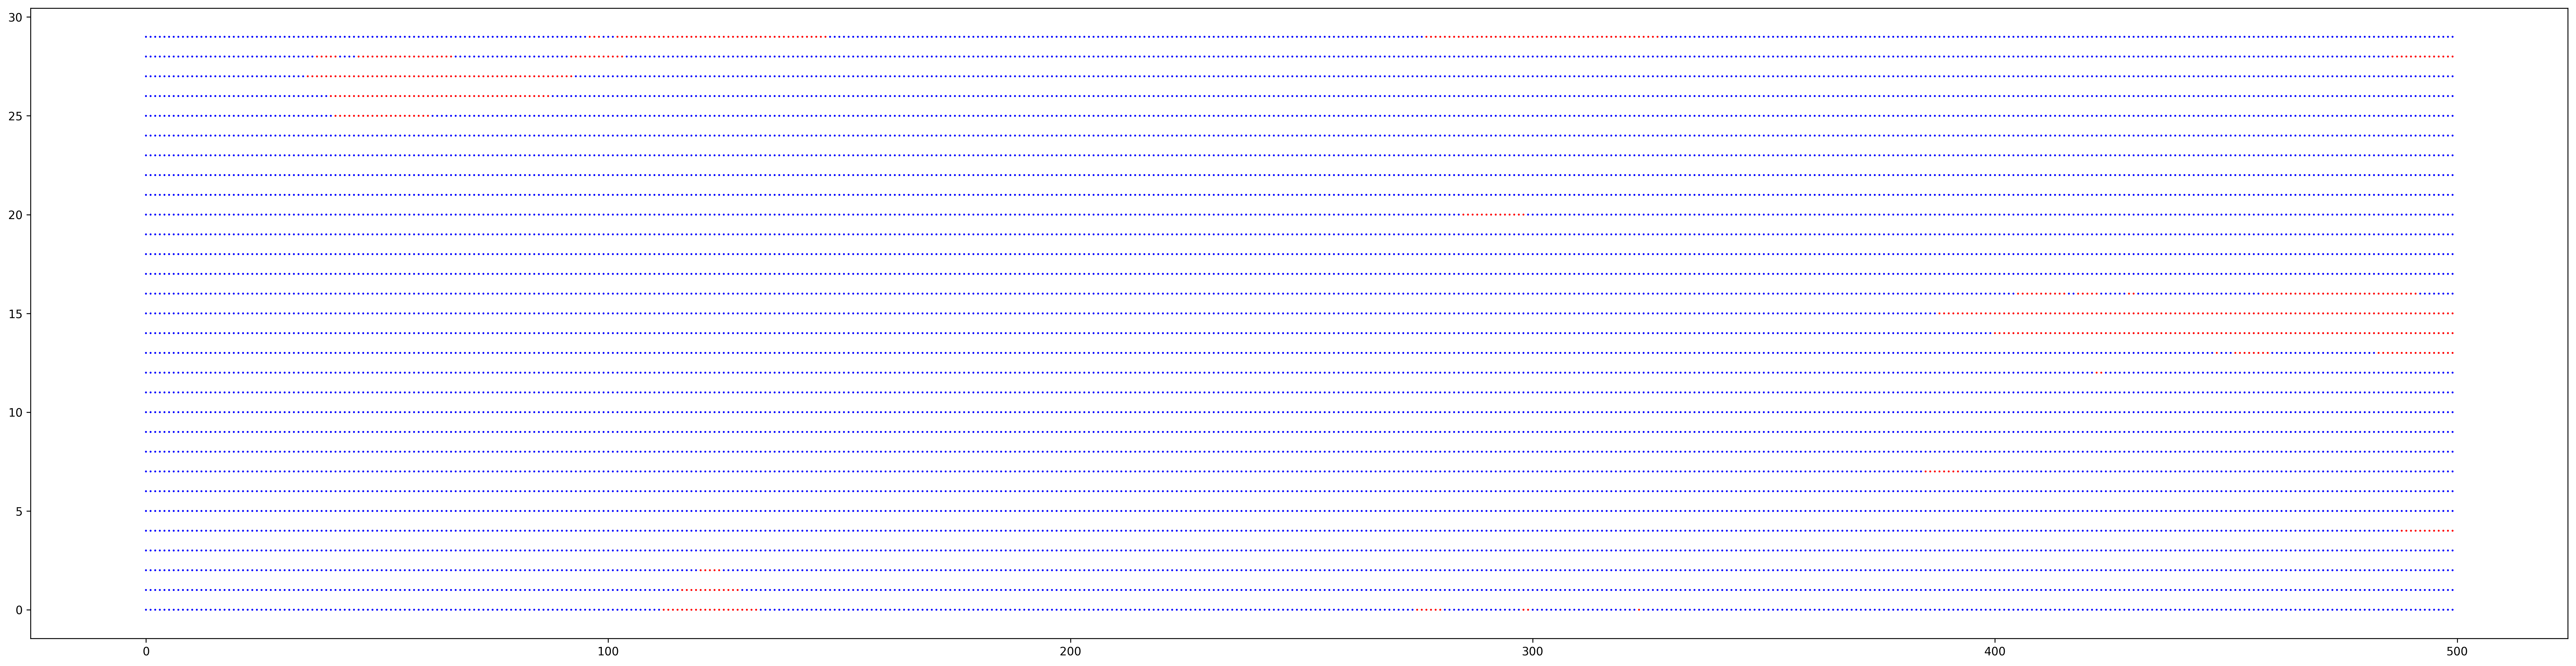

In [10]:
fig = plt.figure(figsize=(40, 10), dpi=300)
for t in range(n_trials):
    plt.scatter(t*np.ones(N), np.arange(N), marker= "o", s= 0.5, c = ["blue" if s==1 else "red"  for s in states[t]])
plt.savefig("Ising_spinflip.png", dpi = 500)

In [7]:
for t in range(n_trials):
    s = np.sum(states[t])
    print(s)

#print(np.sum(states[100]))

30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
28.0
28.0
26.0
26.0
26.0
24.0
22.0
24.0
24.0
24.0
24.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
24.0
24.0
24.0
24.0
24.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
28.0
28.0
28.0
28.0
26.0
28.0
28.0
28.0
26.0
26.0
26.0
28.0
28.0
28.0
26.0
26.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
26.0
26.0
26.0
26.0
24.0
24.0
24.0
24.0
22.0
22.0
22.0
22.0
22.0
24.0
24.0
24.0
24.0
26.0
26.0
26.0
26.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0


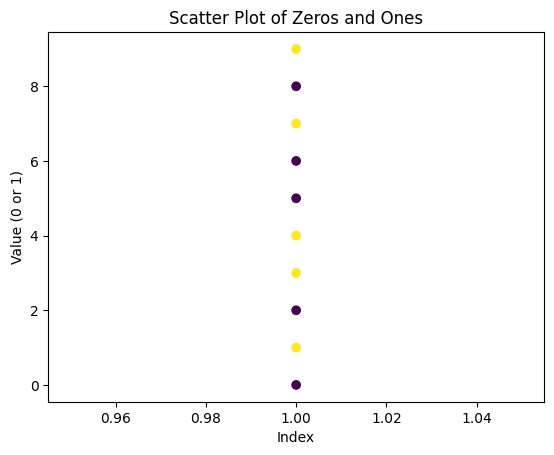

In [8]:
import matplotlib.pyplot as plt

# Your array with zeros and ones
data = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]

# Create a list of colors based on the values in the array
colors = ['blue' if value == 0 else 'red' for value in data]

# Create a scatter plot with blue and red markers
plt.scatter(np.ones(len(data)), np.arange(len(data)), c=data, marker='o')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value (0 or 1)')
plt.title('Scatter Plot of Zeros and Ones')

# Show the plot
plt.show()